In [5]:
using Revise
using BilevelTrajOpt

using RigidBodyDynamics
using Plots
gr(size=(500,500), html_output_format=:png);

In [133]:
urdf = joinpath("..", "urdf", "ball.urdf")
mechanism = parse_urdf(Float64, urdf)
body = findbody(mechanism, "ball")
basejoint = joint_to_parent(body, mechanism)
floatingjoint = Joint(basejoint.name, frame_before(basejoint), frame_after(basejoint), QuaternionFloating{Float64}())
replace_joint!(mechanism, basejoint, floatingjoint)
position_bounds(floatingjoint) .= RigidBodyDynamics.Bounds(-100, 100)
velocity_bounds(floatingjoint) .= RigidBodyDynamics.Bounds(-100, 100)
μ = 0.5
motion_type = :xyz
point = Point3D(default_frame(findbody(mechanism, "floor")), [0.,0.,0.])
normal = FreeVector3D(default_frame(findbody(mechanism, "floor")), [0.,0.,1.])
hs = HalfSpace(point, normal)
floor = Obstacle(hs, μ, motion_type)
obstacles = [floor]
env = parse_contacts(mechanism, urdf, obstacles)
x0 = MechanismState(mechanism)
Δt = 0.005;

In [134]:
q0 = [1., 0., 0., 0., 0., 0., 0.0]
v0 = [0., 0., 0., 0.1, 0. , 0.]
N = 10

set_configuration!(x0, q0)
set_velocity!(x0, v0)
setdirty!(x0)

ctrl! = (u,t,x) -> u[:] .= 0.;

In [ ]:
println("Explicit Contacts")
traj_exp = BilevelTrajOpt.simulate_ipopt(x0,env,Δt,N,ctrl!,implicit_contact=false);

In [ ]:
println("Implicit Contacts")
traj_imp = BilevelTrajOpt.simulate_ipopt(x0,env,Δt,N,ctrl!,implicit_contact=true);

In [135]:
println("Explicit Contacts")
traj_exp = BilevelTrajOpt.simulate_snopt(x0,env,Δt,N,ctrl!,implicit_contact=false);

Explicit Contacts
 15.348131 seconds (22.49 M allocations: 1006.485 MiB, 8.85% gc time)
  0.003967 seconds (1.76 k allocations: 272.844 KiB)
  0.002333 seconds (1.76 k allocations: 272.844 KiB)
  0.002160 seconds (1.76 k allocations: 272.844 KiB)
  0.002159 seconds (1.76 k allocations: 272.844 KiB)
  0.002840 seconds (1.76 k allocations: 272.844 KiB)
Finished successfully: optimality conditions satisfied
  0.003282 seconds (1.76 k allocations: 272.844 KiB)
  0.002312 seconds (1.76 k allocations: 272.844 KiB)
  0.002934 seconds (1.76 k allocations: 272.844 KiB)
Finished successfully: optimality conditions satisfied
  0.002536 seconds (1.76 k allocations: 272.844 KiB)
  0.002349 seconds (1.76 k allocations: 272.844 KiB)
  0.002712 seconds (1.76 k allocations: 272.844 KiB)
Finished successfully: optimality conditions satisfied
  0.003390 seconds (1.76 k allocations: 272.844 KiB)
  0.002555 seconds (1.76 k allocations: 272.844 KiB)
  0.003325 seconds (1.76 k allocations: 272.844 KiB)
Finis

In [149]:
println("Implicit Contacts")
traj_imp = BilevelTrajOpt.simulate_snopt(x0,env,Δt,N,ctrl!,implicit_contact=true);

Implicit Contacts
 54.129628 seconds (61.26 M allocations: 2.804 GiB, 8.99% gc time)
  0.887579 seconds (1.25 M allocations: 228.728 MiB, 66.81% gc time)
  0.498753 seconds (1.25 M allocations: 228.729 MiB, 40.46% gc time)
  0.505273 seconds (1.25 M allocations: 228.728 MiB, 35.15% gc time)
  0.508114 seconds (1.25 M allocations: 228.728 MiB, 38.33% gc time)
  0.485169 seconds (1.25 M allocations: 228.728 MiB, 36.62% gc time)
  0.516305 seconds (1.25 M allocations: 228.728 MiB, 39.50% gc time)
Finished successfully: requested accuracy could not be achieved
  0.487327 seconds (1.25 M allocations: 228.728 MiB, 36.75% gc time)
  0.495996 seconds (1.25 M allocations: 228.728 MiB, 38.76% gc time)
  0.485426 seconds (1.25 M allocations: 228.729 MiB, 36.99% gc time)
  0.479917 seconds (1.25 M allocations: 228.728 MiB, 36.91% gc time)
  0.515197 seconds (1.25 M allocations: 228.728 MiB, 38.65% gc time)
  0.502319 seconds (1.25 M allocations: 228.728 MiB, 35.62% gc time)
  0.494799 seconds (1.2

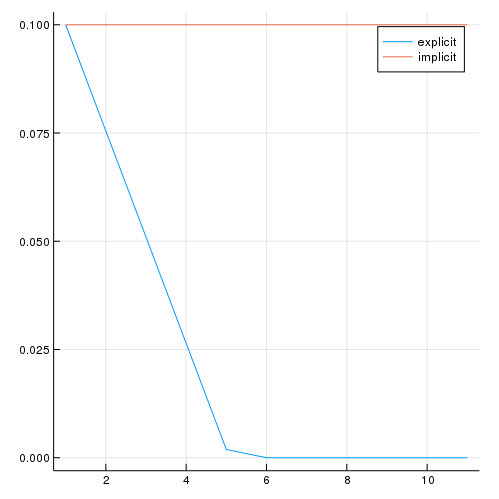

In [150]:
ts = cumsum([Δt for i in 1:N]);
j = 11
plot(traj_exp[j,:],label="explicit")
plot!(traj_imp[j,:],label="implicit")